In [4]:
import scipy.io.wavfile  as sw
import IPython.display as ipd
from scipy import signal
from scipy import fftpack as sf
import matplotlib.pyplot as plt
import numpy as np

(113360,)


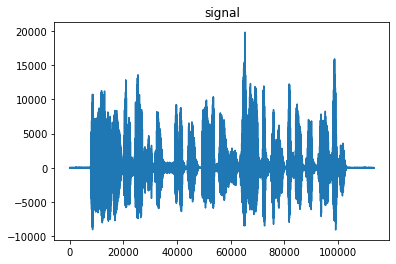

In [5]:
fs,data = sw.read('recorded.wav')
print(data.shape)
plt.plot(data)
plt.title("signal")
ipd.Audio('recorded.wav')

In [6]:
n = np.linspace(0, 7, num = 113360)
fnoise = 5000
noise = 40 * np.sin(2 * np.pi * fnoise * n)


In [7]:
noisy_data = data + noise

In [8]:
print(noisy_data.shape)

(113360,)


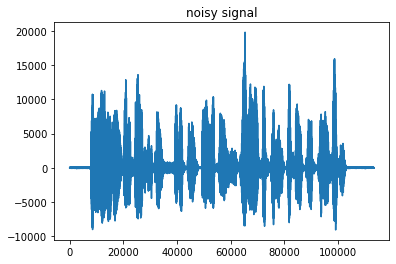

In [9]:
plt.plot(noisy_data)
plt.title("noisy signal")
plt.show()
ipd.display(ipd.Audio(data=noisy_data, rate=fs))

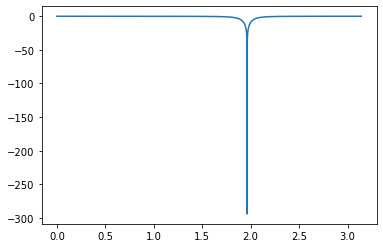

In [24]:
b_notch, a_notch = signal.iirnotch(5000, Q = 10,  fs = 16000)
freq, h = signal.freqz(b_notch, a_notch, fs)
plt.figure('filter')
plt.plot( freq, 20*np.log10(abs(h)))

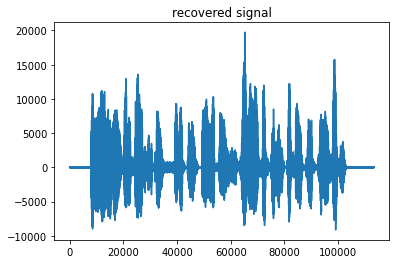

In [25]:
rec = signal.lfilter(b_notch, a_notch, noisy_data)
plt.plot(rec)
plt.title("recovered signal")
plt.show()
ipd.display(ipd.Audio(data=rec, rate=fs))

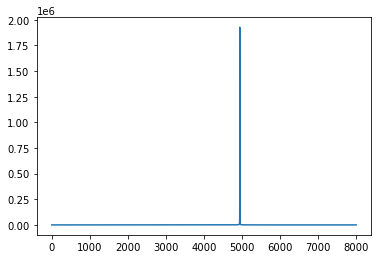

In [26]:
y_f = abs(sf.fft(noise))
n = np.size(noise)
fr = (fs/2)*np.linspace(0,1,round(n/2))
y_m = abs(y_f[0:np.size(fr)])

plt.figure()
plt.plot(fr,y_m)

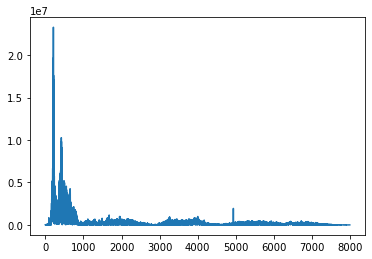

In [27]:
y_f = abs(sf.fft(noisy_data))
n = np.size(noisy_data)
fr = (fs/2)*np.linspace(0,1,round(n/2))
y_m = abs(y_f[0:np.size(fr)])

plt.figure()
plt.plot(fr,y_m)

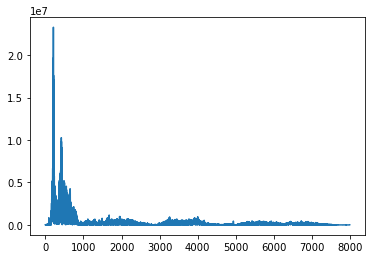

In [28]:
y_f = abs(sf.fft(rec))
n = np.size(rec)
fr = (fs/2)*np.linspace(0,1,round(n/2))
y_m = abs(y_f[0:np.size(fr)])

plt.figure()
plt.plot(fr,y_m)